In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="white", color_codes=True)

%matplotlib inline

UK house prices in 2015 visit https://www.gov.uk/guidance/about-the-price-paid-data for information on the data.

In [2]:
df = pd.read_csv("data/pp-2017.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,{55BDCAE6-6654-521D-E053-6B04A8C0DD7A},450000,2017-06-30 00:00,DA6 8JQ,S,N,F,3,NaN,HANSOL ROAD,NaN,BEXLEYHEATH,BEXLEY,GREATER LONDON,A,A
1,{55BDCAE6-6655-521D-E053-6B04A8C0DD7A},266100,2017-05-26 00:00,SE2 0JA,T,N,F,40,NaN,CAMROSE STREET,NaN,LONDON,GREENWICH,GREATER LONDON,A,A
2,{55BDCAE6-6656-521D-E053-6B04A8C0DD7A},515000,2017-06-30 00:00,SW16 5UU,T,N,F,47,NaN,WOODMANSTERNE ROAD,NaN,LONDON,LAMBETH,GREATER LONDON,A,A
3,{55BDCAE6-6657-521D-E053-6B04A8C0DD7A},1378000,2017-07-07 00:00,SW2 3DP,S,N,F,9,NaN,LANERCOST ROAD,NaN,LONDON,LAMBETH,GREATER LONDON,A,A
4,{55BDCAE6-6658-521D-E053-6B04A8C0DD7A},965000,2017-07-05 00:00,SW13 0QA,T,N,F,84,NaN,WHITE HART LANE,NaN,LONDON,RICHMOND UPON THAMES,GREATER LONDON,A,A


### There are no labels provided with the data, so let's add some.

In [3]:
df.columns = ['id', 'price', 'transfer_date', 'postcode', 'type', 'new', 'duration',
            'paon', 'saon', 'street', 'locality', 'city', 'district', 'county', 'ppd_cat', 'record_status']
df.head()

,id,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status
0,{55BDCAE6-6654-521D-E053-6B04A8C0DD7A},450000,2017-06-30 00:00,DA6 8JQ,S,N,F,3,NaN,HANSOL ROAD,NaN,BEXLEYHEATH,BEXLEY,GREATER LONDON,A,A
1,{55BDCAE6-6655-521D-E053-6B04A8C0DD7A},266100,2017-05-26 00:00,SE2 0JA,T,N,F,40,NaN,CAMROSE STREET,NaN,LONDON,GREENWICH,GREATER LONDON,A,A
2,{55BDCAE6-6656-521D-E053-6B04A8C0DD7A},515000,2017-06-30 00:00,SW16 5UU,T,N,F,47,NaN,WOODMANSTERNE ROAD,NaN,LONDON,LAMBETH,GREATER LONDON,A,A
3,{55BDCAE6-6657-521D-E053-6B04A8C0DD7A},1378000,2017-07-07 00:00,SW2 3DP,S,N,F,9,NaN,LANERCOST ROAD,NaN,LONDON,LAMBETH,GREATER LONDON,A,A
4,{55BDCAE6-6658-521D-E053-6B04A8C0DD7A},965000,2017-07-05 00:00,SW13 0QA,T,N,F,84,NaN,WHITE HART LANE,NaN,LONDON,RICHMOND UPON THAMES,GREATER LONDON,A,A


### The field new is binary and would be more useful as 1's and 0's.

In [4]:
def convert_binary(x, val1, val2):
    """Convert a binary field to 1's and 0's"""
    # True value
    if x == 'Y':
        return 1
    #False value
    elif x == 'N':
        return 0
    else:
        return np.nan
    
df.new = df.new.apply(convert_binary, args=('Y', 'N'))
df.head()

,id,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status
0,{55BDCAE6-6654-521D-E053-6B04A8C0DD7A},450000,2017-06-30 00:00,DA6 8JQ,S,0,F,3,NaN,HANSOL ROAD,NaN,BEXLEYHEATH,BEXLEY,GREATER LONDON,A,A
1,{55BDCAE6-6655-521D-E053-6B04A8C0DD7A},266100,2017-05-26 00:00,SE2 0JA,T,0,F,40,NaN,CAMROSE STREET,NaN,LONDON,GREENWICH,GREATER LONDON,A,A
2,{55BDCAE6-6656-521D-E053-6B04A8C0DD7A},515000,2017-06-30 00:00,SW16 5UU,T,0,F,47,NaN,WOODMANSTERNE ROAD,NaN,LONDON,LAMBETH,GREATER LONDON,A,A
3,{55BDCAE6-6657-521D-E053-6B04A8C0DD7A},1378000,2017-07-07 00:00,SW2 3DP,S,0,F,9,NaN,LANERCOST ROAD,NaN,LONDON,LAMBETH,GREATER LONDON,A,A
4,{55BDCAE6-6658-521D-E053-6B04A8C0DD7A},965000,2017-07-05 00:00,SW13 0QA,T,0,F,84,NaN,WHITE HART LANE,NaN,LONDON,RICHMOND UPON THAMES,GREATER LONDON,A,A


### I can't see myself ever using that id column so let's get rid of it for now. We'll save it incase we need it again.

In [5]:
id_col = df.pop('id')
df.head()

,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status
0,450000,2017-06-30 00:00,DA6 8JQ,S,0,F,3,NaN,HANSOL ROAD,NaN,BEXLEYHEATH,BEXLEY,GREATER LONDON,A,A
1,266100,2017-05-26 00:00,SE2 0JA,T,0,F,40,NaN,CAMROSE STREET,NaN,LONDON,GREENWICH,GREATER LONDON,A,A
2,515000,2017-06-30 00:00,SW16 5UU,T,0,F,47,NaN,WOODMANSTERNE ROAD,NaN,LONDON,LAMBETH,GREATER LONDON,A,A
3,1378000,2017-07-07 00:00,SW2 3DP,S,0,F,9,NaN,LANERCOST ROAD,NaN,LONDON,LAMBETH,GREATER LONDON,A,A
4,965000,2017-07-05 00:00,SW13 0QA,T,0,F,84,NaN,WHITE HART LANE,NaN,LONDON,RICHMOND UPON THAMES,GREATER LONDON,A,A


## Basic exploratory analysis

### How many rows in the dataset?

In [6]:
len(df)

643193

### What datatypes are we dealing with?

In [7]:
for col in df.columns:
    print('{0} : {1}'.format(col, df[col].dtype))

price : int64
transfer_date : object
postcode : object
type : object
new : int64
duration : object
paon : object
saon : object
street : object
locality : object
city : object
district : object
county : object
ppd_cat : object
record_status : object


### What are the basic statistics on the dataset?

In [8]:
df.describe()

,price,new
count,6.431930e+05,643193.000000
mean,3.432375e+05,0.068036
std,2.439954e+06,0.251807
min,1.000000e+00,0.000000
25%,1.399500e+05,0.000000
50%,2.200000e+05,0.000000
75%,3.500000e+05,0.000000
max,1.000000e+09,1.000000


### How many and what percentage of property sales were newly built?

Side note: It would be interesting to look at all the data back from 1995 for new/old houses and their prices.

In [9]:
total_new = df.new.sum()
percentage_new = total_new / len(df) * 100
print('Total new: {0}  | Percentage new: {1}'.format(total_new, percentage_new))

Total new: 43760  | Percentage new: 0


### How are the prices distributed?

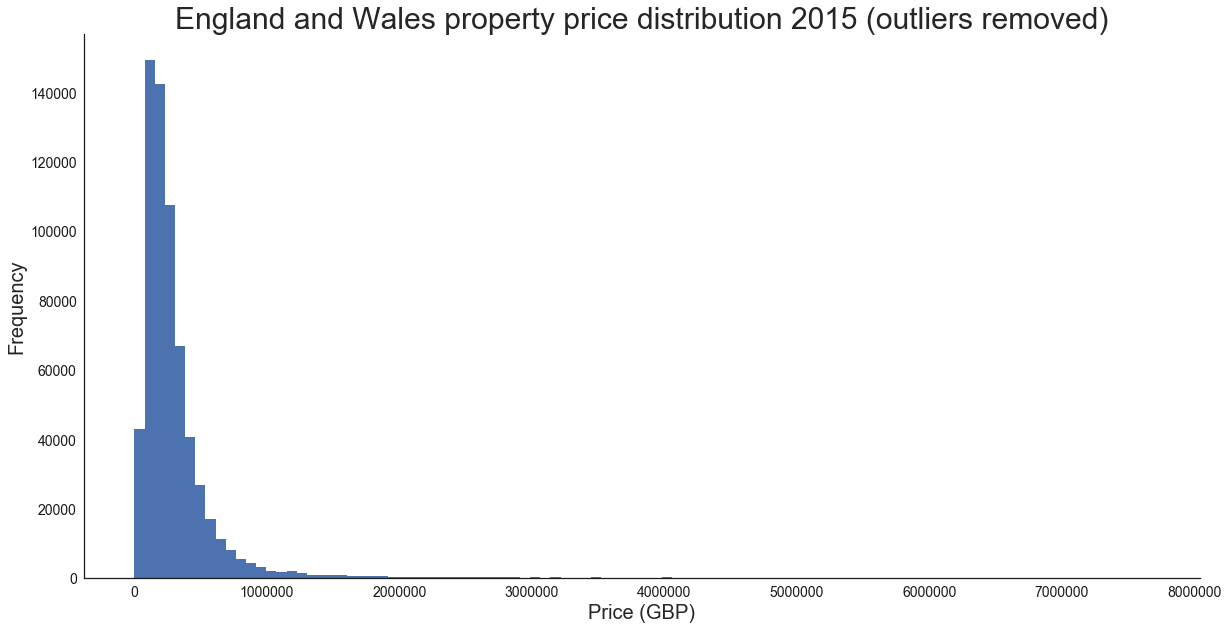

In [11]:
no_outliers = df[np.abs(df.price-df.price.mean())<=(3*df.price.std())]

fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
ax.spines['left'].set_color('#1a1a1a')
ax.spines['bottom'].set_color('#1a1a1a')

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

plt.xticks(fontsize=14, color='#1a1a1a')  
plt.yticks(fontsize=14, color='#1a1a1a')

plt.title('England and Wales property price distribution 2015 (outliers removed)', fontsize=30)
plt.xlabel('Price (GBP)', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

plt.hist(no_outliers.price, bins=100);

### How do the prices of old and new properties compare?

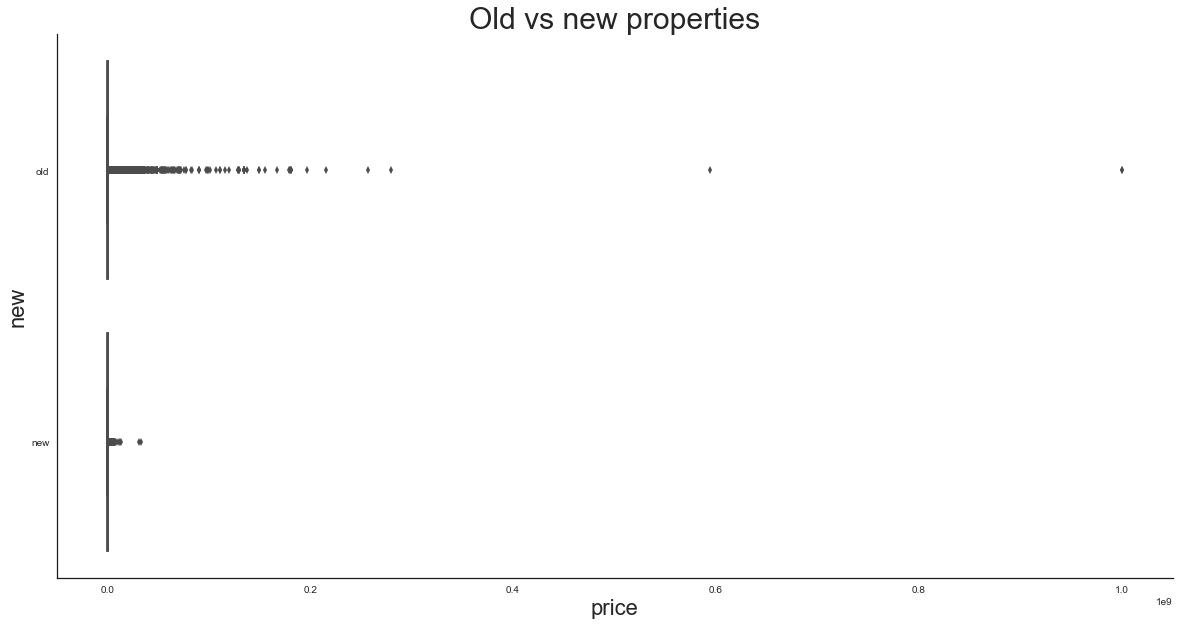

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)

ax.spines['left'].set_color('#1a1a1a')
ax.spines['bottom'].set_color('#1a1a1a')

plt.title('Old vs new properties', fontsize=30)
plt.ylabel('Property ages', fontsize=22)
plt.xlabel('Price', fontsize=22)

boxplot = sns.boxplot(x=df.price, y=df.new, orient='h')
boxplot.set(yticklabels=['old', 'new']);

### Where are new properties being built?

First we need to get the latitude and longitude of each property. We will use the postcode to find the approximate longitude and lattitude of the property which is accurate enough for our purposes.

Postcode longitide and lattitude obtained from https://www.doogal.co.uk/files/postcodes.zip

In [13]:
postcodes = pd.read_csv('data/postcodes.csv', usecols=['Postcode', 'Latitude', 'Longitude'])
postcodes.columns = ['postcode', 'lat', 'lon']
postcodes.head()

,postcode,lat,lon
0,AB1 0AA,57.101478,-2.242852
1,AB1 0AB,57.102558,-2.246309
2,AB1 0AD,57.100560,-2.248342
3,AB1 0AE,57.084447,-2.255708
4,AB1 0AF,57.096659,-2.258103


In [14]:
df = df.merge(postcodes, on='postcode')
df.head()

,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status,lat,lon
0,450000,2017-06-30 00:00,DA6 8JQ,S,0,F,3,NaN,HANSOL ROAD,NaN,BEXLEYHEATH,BEXLEY,GREATER LONDON,A,A,51.454042,0.131523
1,266100,2017-05-26 00:00,SE2 0JA,T,0,F,40,NaN,CAMROSE STREET,NaN,LONDON,GREENWICH,GREATER LONDON,A,A,51.486907,0.102836
2,515000,2017-06-30 00:00,SW16 5UU,T,0,F,47,NaN,WOODMANSTERNE ROAD,NaN,LONDON,LAMBETH,GREATER LONDON,A,A,51.414196,-0.137690
3,470000,2017-07-03 00:00,SW16 5UU,S,0,F,19,NaN,WOODMANSTERNE ROAD,NaN,LONDON,LAMBETH,GREATER LONDON,A,A,51.414196,-0.137690
4,1378000,2017-07-07 00:00,SW2 3DP,S,0,F,9,NaN,LANERCOST ROAD,NaN,LONDON,LAMBETH,GREATER LONDON,A,A,51.439868,-0.109479


There are too many points to plot onto the map, so we will count how many new houses were built on each postcode area and plot them instead.

In [15]:
new = df[df.new == 1]
new_areas = pd.DataFrame(new.groupby(new.postcode.str.extract(r'(\D+)')).postcode.count())
new_areas.columns = ['count']
new_areas.index.names = ['area']
new_areas = new_areas.reset_index()
new_areas.head(10)

C:\Users\BDew\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


,area,count
0,AL,123
1,B,681
2,BA,323
3,BB,297
4,BD,269
5,BH,264
6,BL,117
7,BN,303
8,BR,132
9,BS,653


We need a location for these postcode areas to plot. We will take the mean of all the points in each area to find an approximate location.

In [16]:
def get_by_area(area, df):
    result = df[(new.postcode.str.match('{}[^a-zA-Z].+'.format(area))) & (~new.lat.isnull()) & (~new.lon.isnull())]
    
    return result

def get_mean_area_lat_lon(area, df):
    area_houses = get_by_area(area, df) 
    mean_lat_lon = area_houses.lat.mean(), area_houses.lon.mean()
    
    return mean_lat_lon

new_areas['pos'] = new_areas.area.apply(get_mean_area_lat_lon, args=(new,))
new_areas.head()

,area,count,pos
0,AL,123,"(51.7961873252, -0.263260853659)"
1,B,681,"(52.465453467, -1.87061807342)"
2,BA,323,"(51.203581031, -2.46571799071)"
3,BB,297,"(53.7968273333, -2.33221946465)"
4,BD,269,"(53.8258574089, -1.84822535688)"


Let's plot them on a map, the size correlates to how many new houses are in that area.

C:\Users\BDew\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
C:\Users\BDew\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\BDew\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


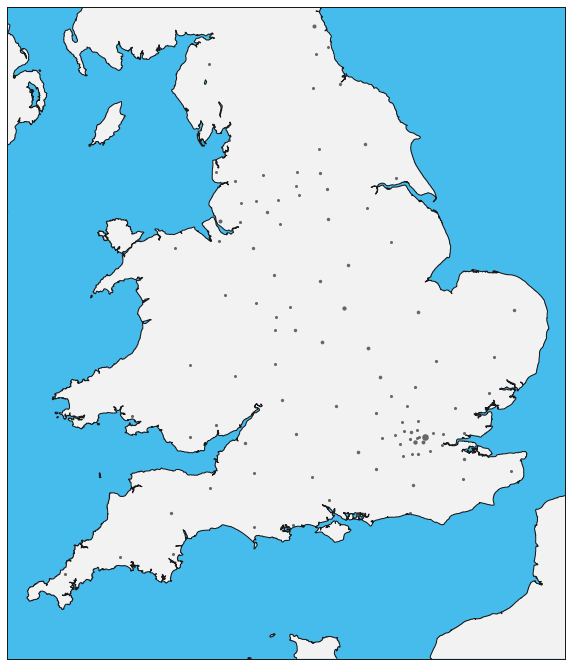

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-6., llcrnrlat= 49.5, urcrnrlon=2., urcrnrlat=55.2) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
    
def plot_area(pos):
    count = new_areas.loc[new_areas.pos == pos]['count']
    x, y = m(pos[1], pos[0])
    size = (count/1000) ** 2 + 3
    m.plot(x, y, 'o', markersize=size, color='#444444', alpha=0.8)
    
new_areas.pos.apply(plot_area)

m

Next let's draw postcode boundaries on the map and colour them depending on how many new houses in that area. The darker the colour, the more new houses in the area.

Uk postcode areas from http://www.opendoorlogistics.com/downloads/

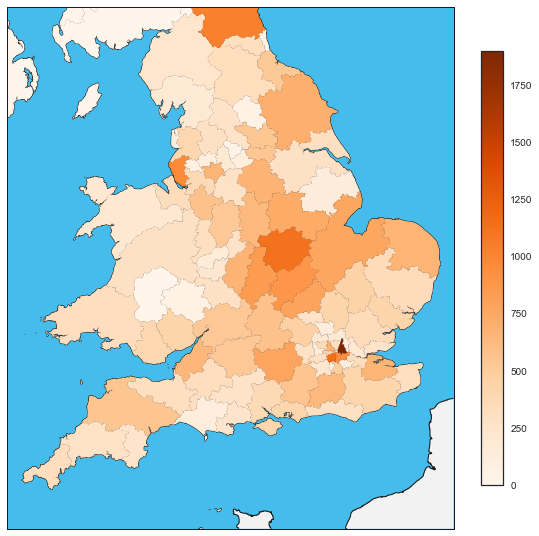

In [18]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import matplotlib.cm


fig, ax = plt.subplots(figsize=(10,20))
m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc', 
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-6., llcrnrlat= 49.5,urcrnrlon=2., urcrnrlat=55.2)
             
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('data/uk_postcode_bounds/Areas', 'areas')

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.areas],
        'area': [area['name'] for area in m.areas_info]
    })
df_poly = df_poly.merge(new_areas, on='area', how='left')

cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['count'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['count'])
plt.colorbar(mapper, shrink=0.4)

m